# Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

# Data Collection


## Loading Packages and Data

In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
import warnings
import xgboost as xgb
import pickle


In [429]:
test = pd.read_csv('/content/Test.csv')
train = pd.read_csv('/content/Train.csv')

In [430]:
train.shape

(8523, 12)

In [431]:
test.shape

(5681, 11)

In [432]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [433]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [434]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [435]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [436]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [437]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# handling nulls

In [438]:
# Calculate the percentage of null values in each column of the train dataset
train_null_percentage = (train.isnull().sum() / len(train)) * 100

# Create a DataFrame to display the percentage of null values
train_null_percentage_df = pd.DataFrame({'Column': train.columns, 'Null_Percentage': train_null_percentage})
train_null_percentage_df = train_null_percentage_df.sort_values(by='Null_Percentage', ascending=False)

# Display the DataFrame showing the percentage of null values
print(train_null_percentage_df)


                                              Column  Null_Percentage
Outlet_Size                              Outlet_Size        28.276428
Item_Weight                              Item_Weight        17.165317
Item_Identifier                      Item_Identifier         0.000000
Item_Fat_Content                    Item_Fat_Content         0.000000
Item_Visibility                      Item_Visibility         0.000000
Item_Type                                  Item_Type         0.000000
Item_MRP                                    Item_MRP         0.000000
Outlet_Identifier                  Outlet_Identifier         0.000000
Outlet_Establishment_Year  Outlet_Establishment_Year         0.000000
Outlet_Location_Type            Outlet_Location_Type         0.000000
Outlet_Type                              Outlet_Type         0.000000
Item_Outlet_Sales                  Item_Outlet_Sales         0.000000


In [439]:
# Calculate the percentage of null values in each column of the test dataset
test_null_percentage = (test.isnull().sum() / len(test)) * 100

# Create a DataFrame to display the percentage of null values
test_null_percentage_df = pd.DataFrame({'Column': test.columns, 'Null_Percentage': test_null_percentage})
test_null_percentage_df = test_null_percentage_df.sort_values(by='Null_Percentage', ascending=False)

# Display the DataFrame showing the percentage of null values
print(test_null_percentage_df)


                                              Column  Null_Percentage
Outlet_Size                              Outlet_Size        28.269671
Item_Weight                              Item_Weight        17.180074
Item_Identifier                      Item_Identifier         0.000000
Item_Fat_Content                    Item_Fat_Content         0.000000
Item_Visibility                      Item_Visibility         0.000000
Item_Type                                  Item_Type         0.000000
Item_MRP                                    Item_MRP         0.000000
Outlet_Identifier                  Outlet_Identifier         0.000000
Outlet_Establishment_Year  Outlet_Establishment_Year         0.000000
Outlet_Location_Type            Outlet_Location_Type         0.000000
Outlet_Type                              Outlet_Type         0.000000


In [440]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [441]:
# Numerical columns imputation
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

# Categorical columns imputation
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)

In [442]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### we finished working with null values of train dataset

In [443]:
# Numerical columns imputation
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)

# Categorical columns imputation
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

In [444]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### we finished working with null values of test dataset

In [445]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

## It seems that the 'Item_Fat_Content' column contains different categories or labels, but there are inconsistencies in the representation of similar categories (e.g., 'Low Fat' represented as 'Low Fat', 'low fat', 'LF'). Similarly, 'Regular' is represented as 'Regular' and 'reg'.

In [446]:
# Standardizing values of train dataset in the 'Item_Fat_Content' column
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [447]:
# Standardizing values of test dataset in the 'Item_Fat_Content' column
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [448]:
# Displaying unique values in the 'Item_Fat_Content' column for training and testing datasets
print("Unique values in 'Item_Fat_Content' column for training dataset:")
print(train['Item_Fat_Content'].unique())

print("\nUnique values in 'Item_Fat_Content' column for testing dataset:")
print(test['Item_Fat_Content'].unique())


Unique values in 'Item_Fat_Content' column for training dataset:
['Low Fat' 'Regular']

Unique values in 'Item_Fat_Content' column for testing dataset:
['Low Fat' 'Regular']


## Removing the "Item_Identifier" and "Outlet_Identifier" columns from train and test dataset is a prudent step. These columns likely serve as identifiers or unique markers for items and outlets but don't directly contribute to the predictive capabilities of the model. Eliminating these columns streamlines the data, focusing on the more meaningful features that impact the model's predictive performance.

In [449]:
# Remove 'Item_Identifier' and 'Outlet_Identifier' columns from train dataset
train.drop(["Item_Identifier", "Outlet_Identifier"], axis=1, inplace=True)

# Remove 'Item_Identifier' and 'Outlet_Identifier' columns from test dataset
test.drop(["Item_Identifier", "Outlet_Identifier"], axis=1, inplace=True)


## Handling Skewness

In [450]:
print(train.skew())

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64


<ipython-input-450-29e9138c06af>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train.skew())


In [451]:
print(test.skew())

Item_Weight                  0.142813
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64


<ipython-input-451-633be1940f68>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(test.skew())


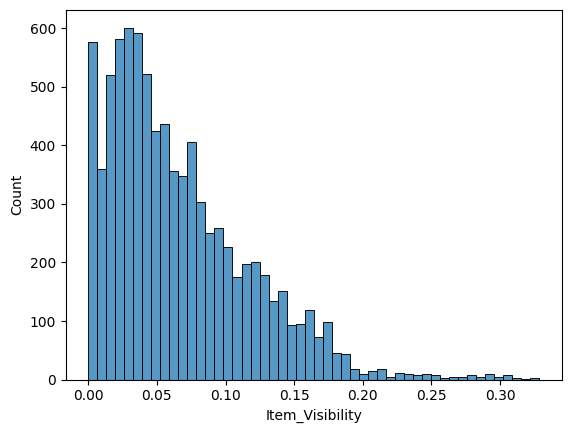

In [452]:
sns.histplot(train['Item_Visibility'])
plt.show()

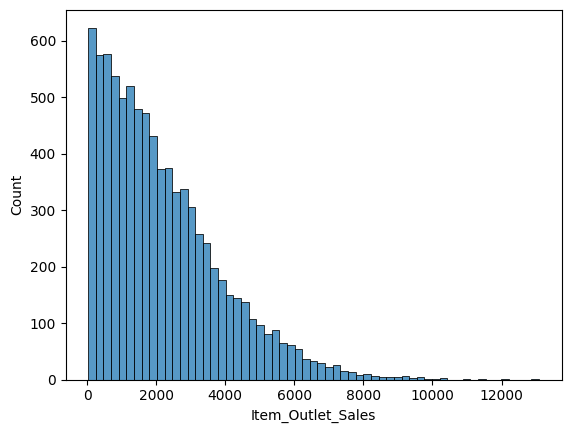

In [453]:
sns.histplot(train['Item_Outlet_Sales'])
plt.show()

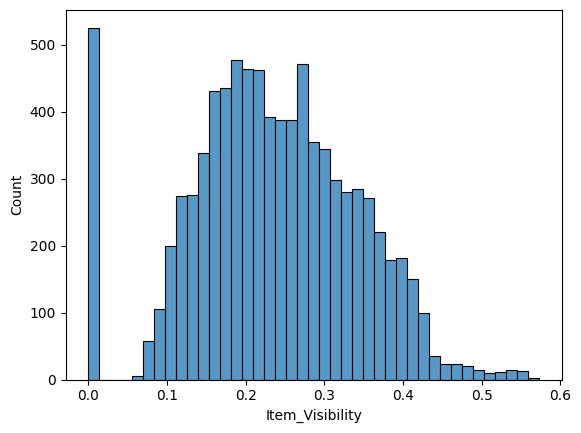

In [454]:
train['Item_Visibility'] = np.sqrt(train['Item_Visibility'])
sns.histplot(train['Item_Visibility'])
plt.show()

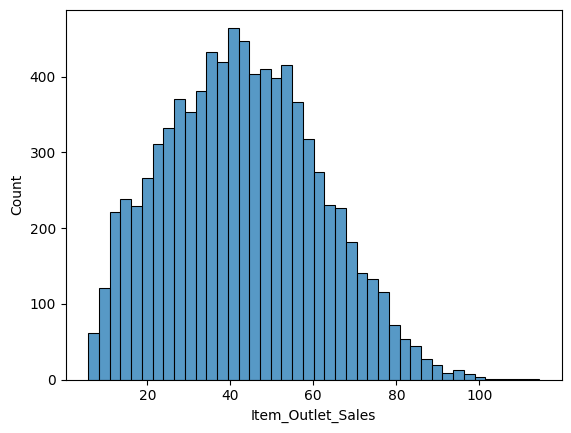

In [455]:
train['Item_Outlet_Sales'] = np.sqrt(train['Item_Outlet_Sales'])
sns.histplot(train['Item_Outlet_Sales'])
plt.show()

<Axes: xlabel='Item_Visibility', ylabel='Count'>

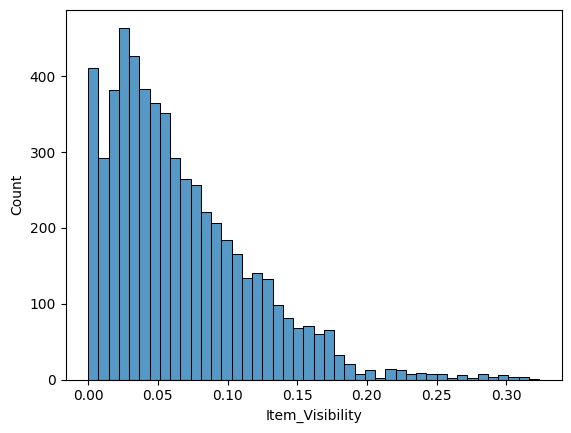

In [456]:
sns.histplot(test['Item_Visibility'])

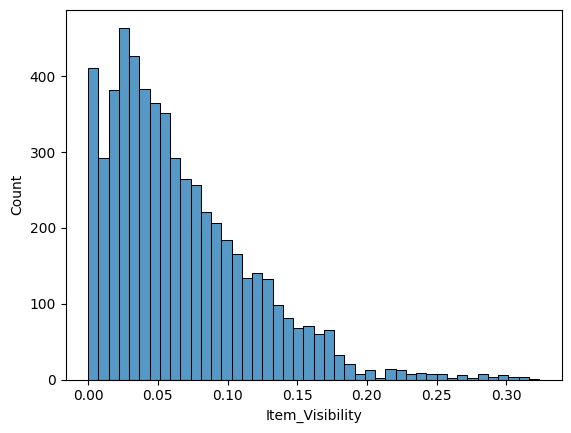

In [457]:
sns.histplot(test['Item_Visibility'])
plt.show()

<Axes: xlabel='Item_Visibility', ylabel='Count'>

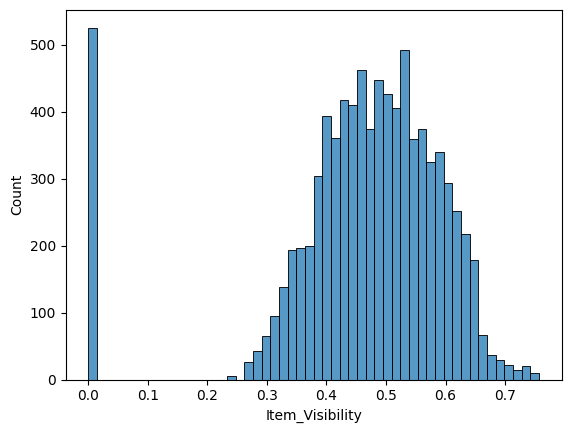

In [458]:
train['Item_Visibility'] = np.sqrt(train['Item_Visibility'])
sns.histplot(train['Item_Visibility'])


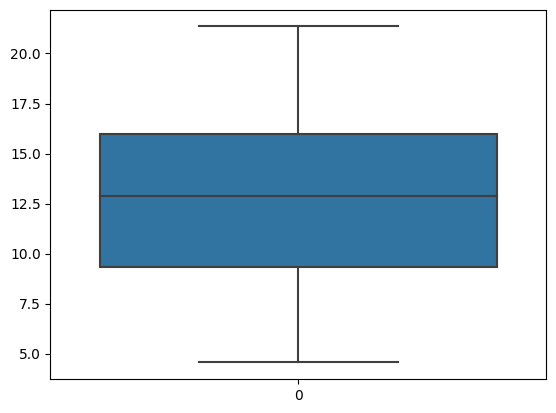

In [459]:
sns.boxplot(train['Item_Weight'])
plt.show()

<Axes: >

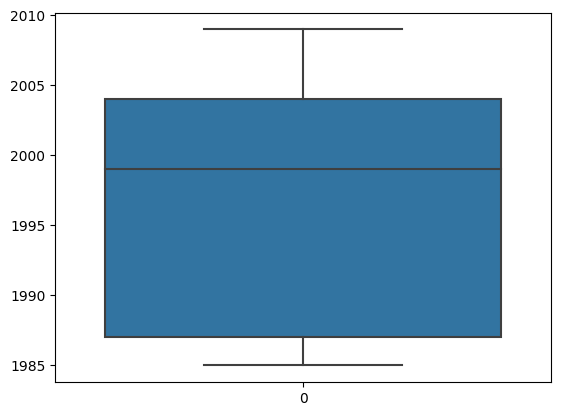

In [460]:
sns.boxplot(train['Outlet_Establishment_Year'])

<Axes: >

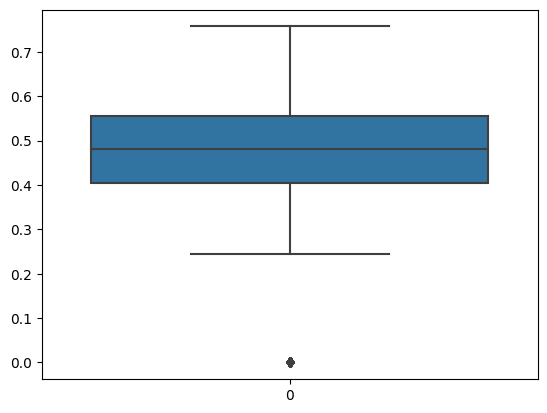

In [461]:
sns.boxplot(train['Item_Visibility'])

In [462]:
maximum_value = train['Item_Visibility'].max()
print("Maximum value of Item Visibility:", maximum_value)

Maximum value of Item Visibility: 0.7570033377052537


In [463]:
Q1 = train['Item_Visibility'].quantile(0.25)
Q3 = train['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train[(train['Item_Visibility'] < lower_bound) | (train['Item_Visibility'] > upper_bound)]
mean_value = train['Item_Visibility'].median()

train.loc[outliers.index, 'Item_Visibility'] = mean_value

<Axes: >

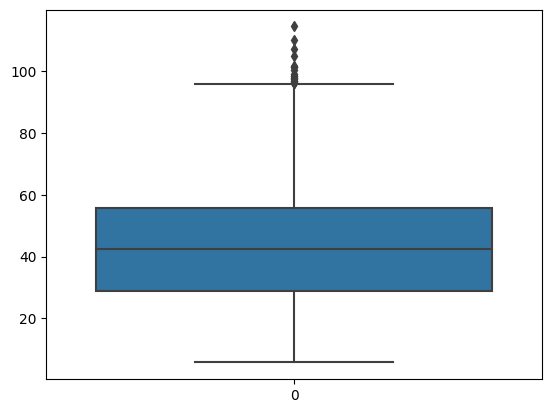

In [464]:
sns.boxplot(train['Item_Outlet_Sales'])

In [465]:
maximum_value = train['Item_Outlet_Sales'].max()
print("Maximum value of Item Outlet Sales:", maximum_value)

Maximum value of Item Outlet Sales: 114.39827271423289


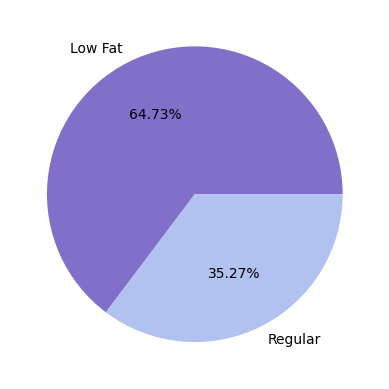

In [466]:
label = ["Low Fat", "Regular"]
colors = ["#826fc9", "#b1c2f0"]

plt.pie(train["Item_Fat_Content"].value_counts(), labels=label, autopct='%2.2f%%', colors=colors)
plt.show()

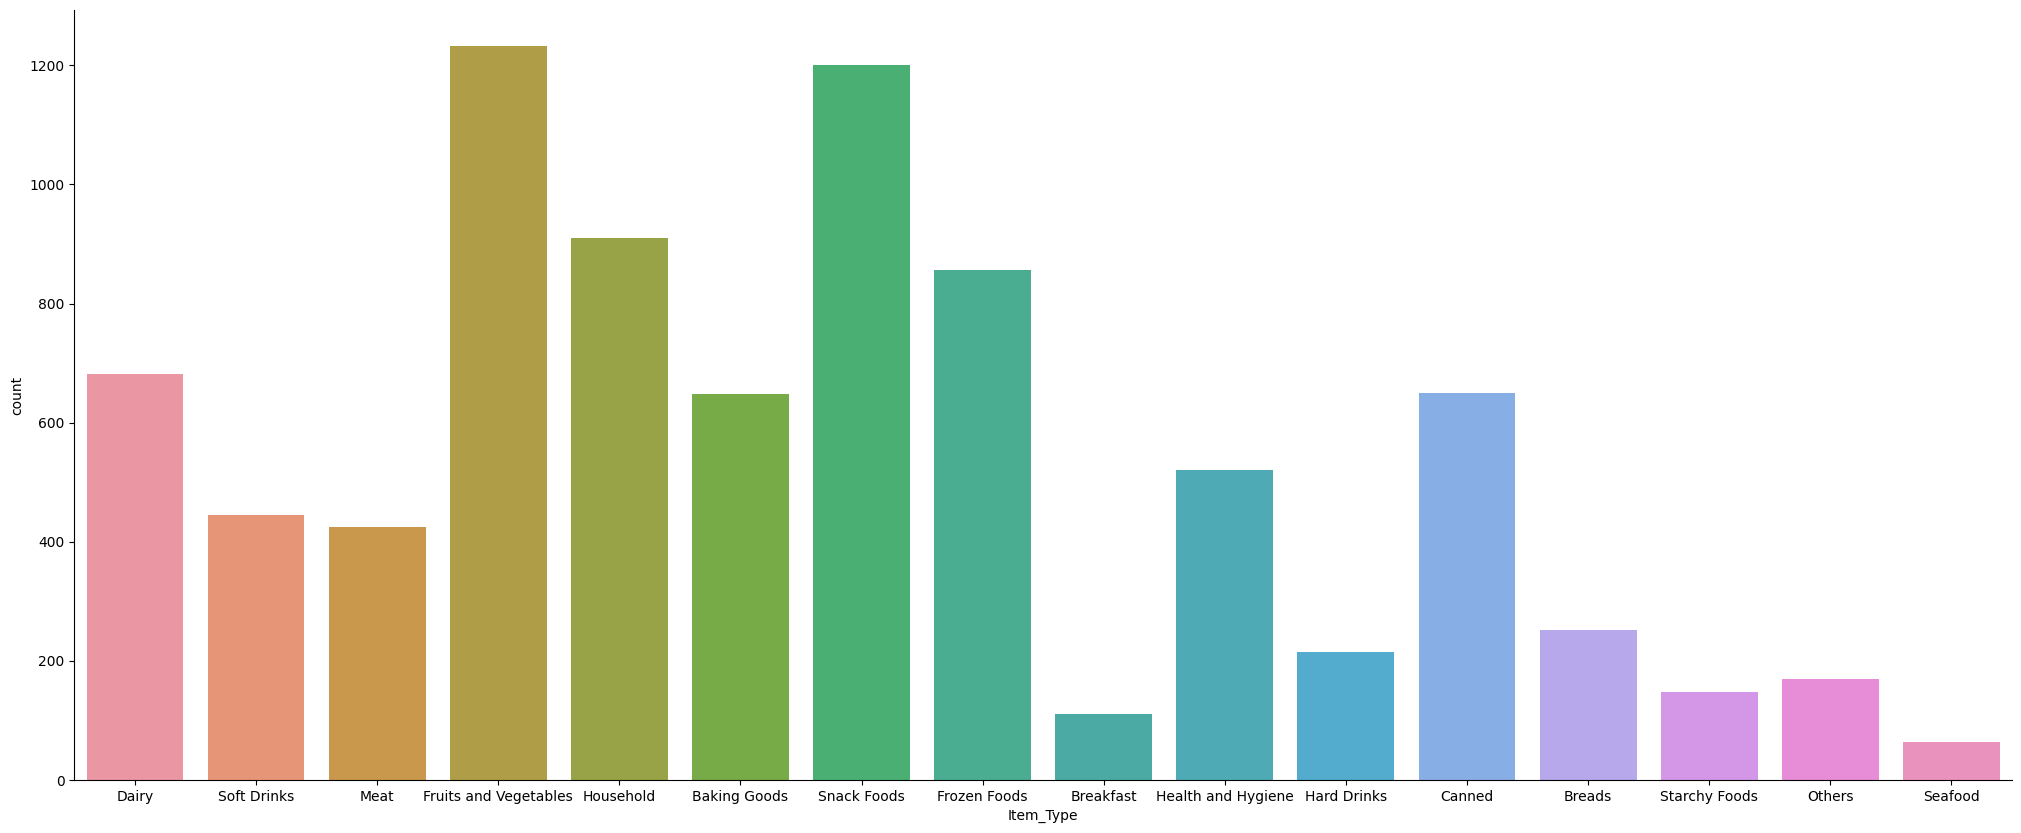

In [467]:
plt.figure(figsize=(25,10))
sns.countplot(x="Item_Type", data=train)
sns.despine()

<ipython-input-468-0212e26e996f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train.corr()


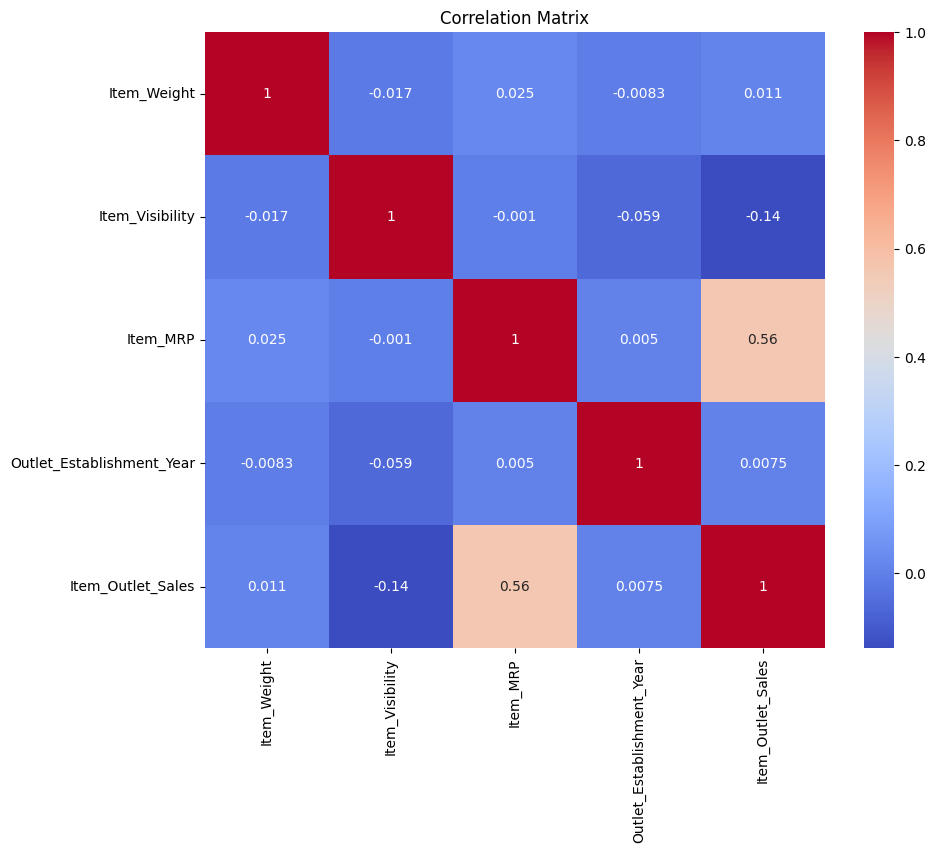

In [468]:
plt.figure(figsize=(10, 8))
correlation = train.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


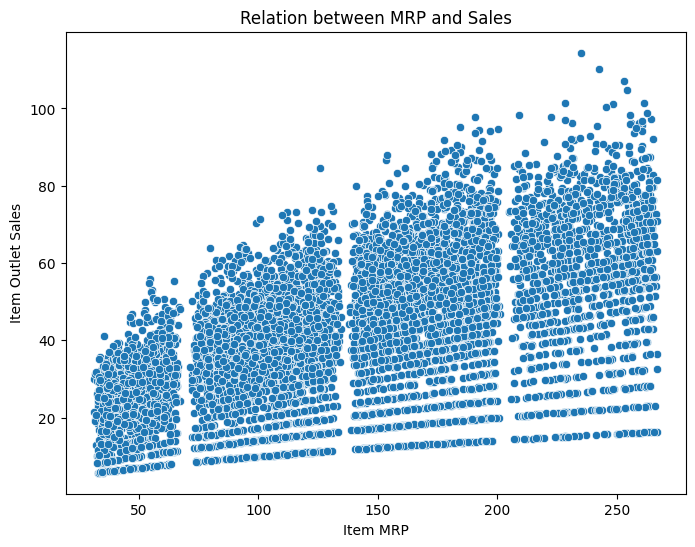

In [469]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train)
plt.title('Relation between MRP and Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

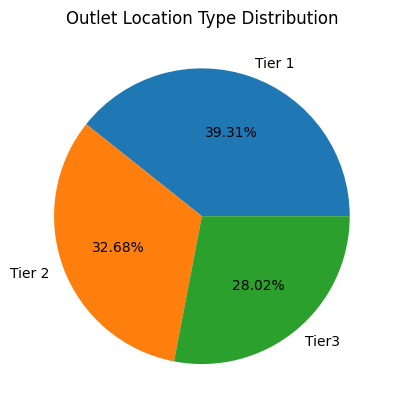

In [470]:
label = ["Tier 1", "Tier 2" , "Tier3"]

plt.pie(train["Outlet_Location_Type"].value_counts(), labels=label, autopct='%2.2f%%')
plt.title('Outlet Location Type Distribution')
plt.show()

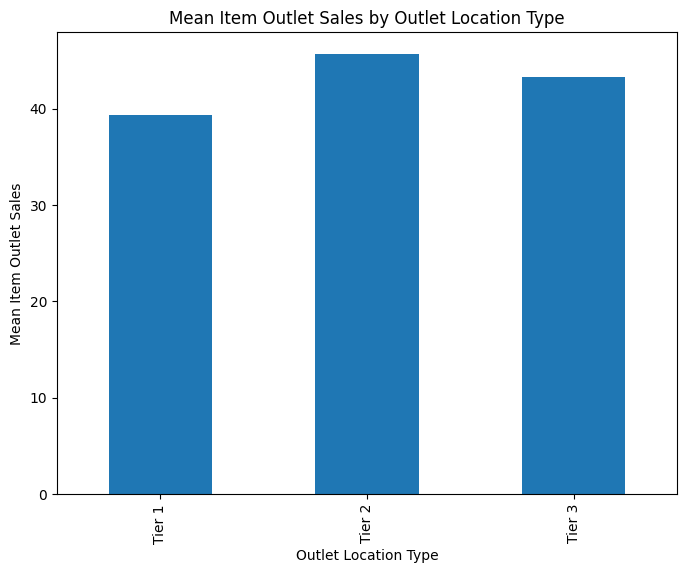

In [471]:
plt.figure(figsize=(8, 6))
train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot(kind='bar')
plt.title('Mean Item Outlet Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Mean Item Outlet Sales')
plt.show()


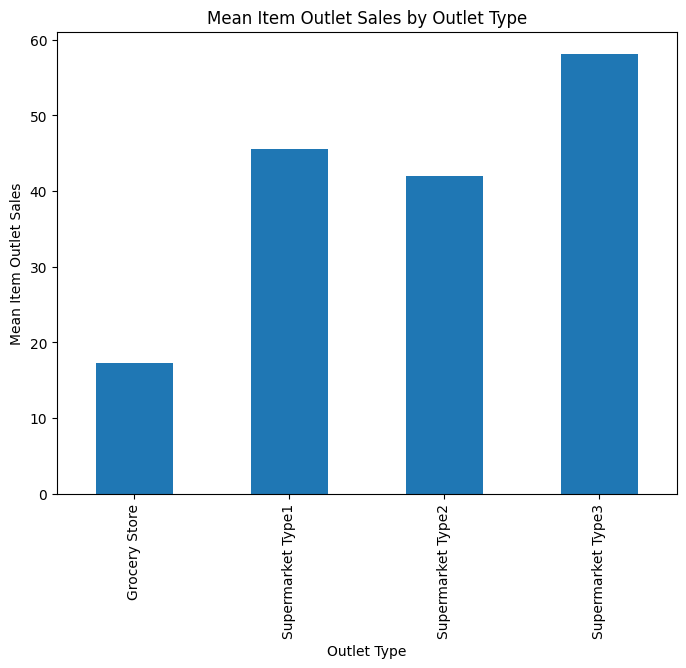

In [472]:
plt.figure(figsize=(8, 6))
train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot(kind='bar')
plt.title('Mean Item Outlet Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Mean Item Outlet Sales')
plt.show()

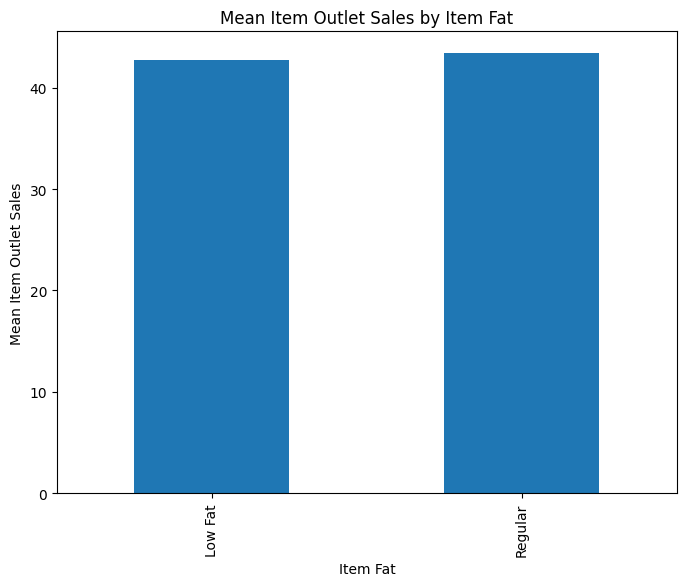

In [473]:
plt.figure(figsize=(8, 6))
train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot(kind='bar')
plt.title('Mean Item Outlet Sales by Item Fat')
plt.xlabel('Item Fat')
plt.ylabel('Mean Item Outlet Sales')
plt.show()

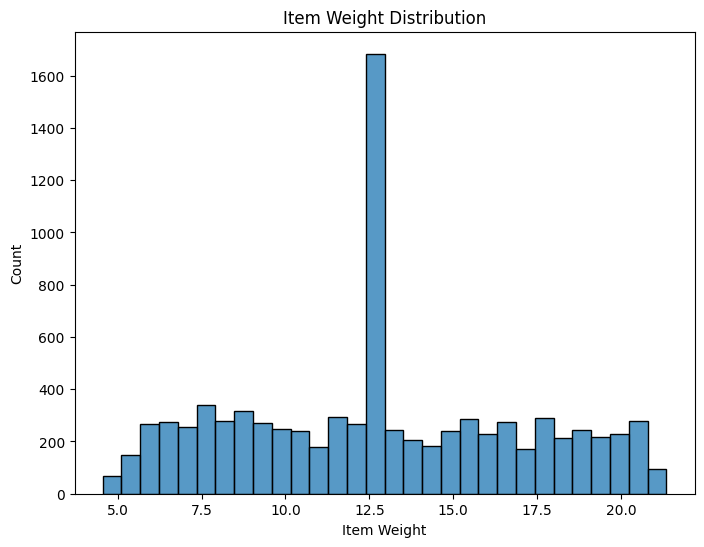

In [474]:
plt.figure(figsize=(8, 6))
sns.histplot(train['Item_Weight'], bins=30)
plt.title('Item Weight Distribution')
plt.xlabel('Item Weight')
plt.ylabel('Count')
plt.show()

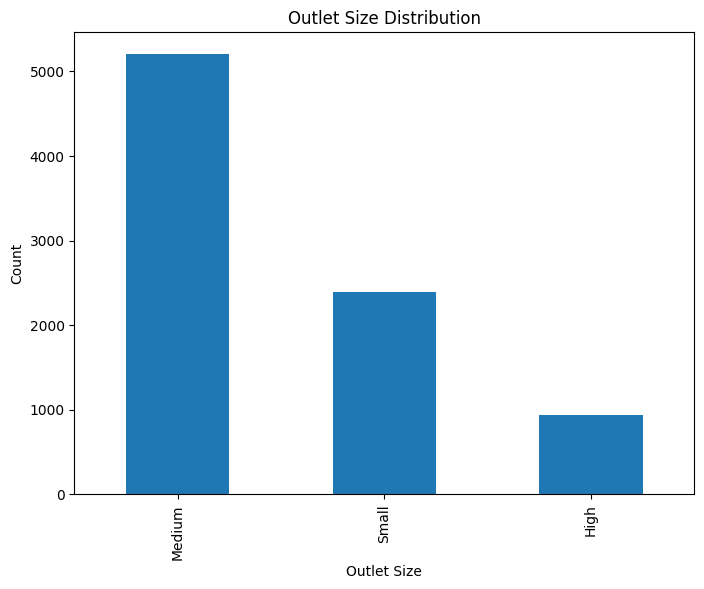

In [475]:

plt.figure(figsize=(8, 6))
train['Outlet_Size'].value_counts().plot(kind='bar')
plt.title('Outlet Size Distribution')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.show()


Working with Categorical data

In [476]:
print(train['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [477]:
train = pd.get_dummies(train, columns=['Item_Fat_Content'])
test = pd.get_dummies(test, columns=['Item_Fat_Content'])

In [478]:
print(train['Item_Type'].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [479]:
label_encoder = LabelEncoder()
train['Item_Type_Encoded'] = label_encoder.fit_transform(train['Item_Type'])
train.drop("Item_Type",axis=1,inplace=True)

In [480]:
test['Item_Type_Encoded'] = label_encoder.fit_transform(test['Item_Type'])
test.drop("Item_Type",axis=1,inplace=True)

In [481]:
print(train['Outlet_Size'].unique())

['Medium' 'High' 'Small']


In [482]:
size= {'Small': 0, 'Medium': 1, 'High': 2}
train['Outlet_Size_Encoded'] = train['Outlet_Size'].replace(size)
train.drop("Outlet_Size",axis=1,inplace=True)

In [483]:
size2= {'Small': 0, 'Medium': 1, 'High': 2}
test['Outlet_Size_Encoded'] = test['Outlet_Size'].replace(size2)
test.drop("Outlet_Size",axis=1,inplace=True)

In [484]:
print(train['Outlet_Location_Type'].unique())

['Tier 1' 'Tier 3' 'Tier 2']


In [485]:
train['Outlet_Location_Type_Encoded'] = label_encoder.fit_transform(train['Outlet_Location_Type'])
train.drop("Outlet_Location_Type",axis=1,inplace=True)

In [486]:
test['Outlet_Location_Type_Encoded'] = label_encoder.fit_transform(test['Outlet_Location_Type'])
test.drop("Outlet_Location_Type",axis=1,inplace=True)

In [487]:
print(train['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [488]:
train['Outlet_Type_Encoded'] = label_encoder.fit_transform(train['Outlet_Type'])
train.drop("Outlet_Type",axis=1,inplace=True)

In [489]:
test['Outlet_Type_Encoded'] = label_encoder.fit_transform(test['Outlet_Type'])
test.drop("Outlet_Type",axis=1,inplace=True)

In [490]:
train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Encoded,Outlet_Size_Encoded,Outlet_Location_Type_Encoded,Outlet_Type_Encoded
0,9.300,0.355918,249.8092,1999,61.115775,1,0,4,1,0,1
1,5.920,0.372620,48.2692,2009,21.057607,0,1,14,1,2,2
2,17.500,0.359806,141.6180,1999,45.795961,1,0,10,1,0,1
3,19.200,0.481903,182.0950,1998,27.062520,0,1,6,1,2,0
4,8.930,0.481903,53.8614,1987,31.538947,1,0,9,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.488152,214.5218,1987,52.710373,1,0,13,2,2,1
8519,8.380,0.465569,108.1570,2002,23.436830,0,1,0,1,1,1
8520,10.600,0.433105,85.1224,2004,34.541477,1,0,8,0,1,1
8521,7.210,0.617315,103.1332,2009,42.960419,0,1,13,1,2,2


In [491]:
test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Encoded,Outlet_Size_Encoded,Outlet_Location_Type_Encoded,Outlet_Type_Encoded
0,20.750000,0.007565,107.8622,1999,1,0,13,1,0,1
1,8.300000,0.038428,87.3198,2007,0,1,4,1,1,1
2,14.600000,0.099575,241.7538,1998,1,0,11,1,2,0
3,7.315000,0.015388,155.0340,2007,1,0,13,1,1,1
4,12.695633,0.118599,234.2300,1985,0,1,4,1,2,3
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997,0,1,13,0,0,1
5677,7.600000,0.142991,169.1448,2009,0,1,15,1,2,2
5678,10.000000,0.073529,118.7440,2002,1,0,8,1,1,1
5679,15.300000,0.000000,214.6218,2007,0,1,3,1,1,1


# Scaling

In [492]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train)

train = pd.DataFrame(scaled_data, columns=train.columns)

In [493]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(test)

test = pd.DataFrame(scaled_data, columns=test.columns)

# Modeling: Linear Regression

In [496]:
X = train.drop(['Item_Visibility', 'Item_Outlet_Sales'], axis=1)
y = train['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.011675408769229012
R-squared (R2) Score: 0.5807778504331444


In [499]:

X = train.drop(['Item_Visibility', 'Item_Outlet_Sales'], axis=1)
y = train['Item_Outlet_Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

alpha = 0.1
model = Ridge(alpha=alpha)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)



Mean Squared Error (MSE): 0.011680648934910873
R-squared (R2) Score: 0.5805896948349417


## RandomForest

In [500]:
X = train.drop([ 'Item_Outlet_Sales'], axis=1)
y = train['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = 100
model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.009632272161555504
R-squared (R2) Score: 0.6541395748453153


## XGBoost

In [503]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.010057085948888796
R-squared (R2) Score: 0.6388860318977769
